# Beginner - EDA and Visualizations


### Andy and Juan Notes to Complete in Notebook
### Delete once finished

Beginner Section Activities (Basic Data Analysis or EDA):
* Import / initial look (see dataframe)
* Plot several histograms of features
* Using different plotting libraries (scatterplot)
    - Seaborn, Altair, Matplotlib
* Show basic statistics
* Identifying problems (0 value columns)
* Subset by features and by samples
    - In context of training / testing
    - Possibly do correlation with column subset 


# Overview

This is the beginner level notebook for the Data Science (DS) and Machine Learning (ML) FredHutch.io tutorial, where we will work through beginning to end on different aspects and techniques in DS for Research and Analysis. 

In this notebook we will work through the process of data analysis for the [gene expression cancer RNA-Seq Data Set](https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#). This is the beginner or novice notebook and we will focus on general data cleanup, manipulation, and analysis techniques in **python**. 


# Table of Contents
[1. Setup](#1.-Setup)

* [1.1 Importing Libraries](#1.1-Importing-Libraries)  

* [1.2 Importing the Data](#1.2-Importing-the-Data)  
    * [1.2.1 Loading Data and Initial Observations](#1.2.1-Loading-Data-and-Initial-Observations)

* [1.3 Taking a Look](#1.3-Taking-a-Look)

* [1.4 Subsetting a Dataframe](#1.4-Subsetting-a-Dataframe)

* [1.5 Dealing with Problem Features](#1.5-Dealing-with-Problem-Features)


[2. Analysis](#2.-Analysis)

* [2.1 General Descriptive Statistics](#2.1-General-Descriptive-Statistics)

* [2.2 Visualising Statistics](#2.2-Visualising-Statistics)

    * [2.2.1 Seaborn & Matplotlib](#2.2.1-Seaborn-&-Matplotlib)
    * [2.2.2 Dataframe Format for Seaborn](#2.2.2-Dataframe-Format-for-Seaborn)
    
[3. TCGA Data, Specific Group Statistics, and Altair](#3.-TCGA-Data,-Specific-Group-Statistics,-and-Altair)

* [3.1 Loading and Cleaning TCGA Data](#3.1-Loading-and-Cleaning-TCGA-Data)

* [3.2 Creating Specific Group Statistics](#3.2-Creating-Specific-Group-Statistics)

* [3.3 Visualizing Statistics with Altair](#3.3-Visualizing-Statistics-with-Altair)

# 1. Setup

## 1.1 Importing Libraries

 We will introduce *python libraries* which will be used all through the three tutorial notebooks.
 
> **Libraries Used in This Tutorial**
* Data Manipulation and Processing
     - [pandas]( https://pandas.pydata.org/)
     - [numpy]( https://numpy.org/)
* Data Visualization
	- [Matplotlib](https://matplotlib.org/)
    - [Seaborn](https://seaborn.pydata.org/)
    - [Altair](https://altair-viz.github.io/) 

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# the output of plotting commands is displayed inline within the notebook
%matplotlib inline

## 1.2 Importing the Data
To do anything with your data, you need to get the data into an 'object' that python can interact with.

The Pandas library we imported above features some built in functions to read a file which is in '.csv' format and create a Pandas dataframe from it:

### 1.2.1 Loading Data and Initial Observations

Now that we have imported our initial libraries, we can now use these to load our data into the notebook to start out analysis. Both **pandas** and **numpy** are powerful libraries capable of handling loading data, but the standard is **pandas** as it is design for this purpose: *it offers data structures and operations for manipulating numerical tables and time series.*

*pandas* offers a variety of functions for loading data depending on the type of file format that your data is stored (e.g. *csv, txt, json, …*), the different formats can be [found here]( https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

Our specific dataset comes from a tar.gz file and once extracted we have the data in two *csv* files
* data.csv – file containing the individual samples gene expression cancer RNA-Seq Data Set
* labels.csv – files with the Class of cancer (BRCA, KIRC, COAD, LUAD and PRAD) each sample belongs to

You will want to have the correct file path in relation to where your current working notebook is located to properly load the file (i.e., folder/subfolder/data.csv). For our notebook, the files are located in the same directory so we can just write the names into the [*pd.read_csv()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function. The pandas functions to read in data provide with a wide range of options to parse in the data, such as setting in the appropriate header row or index columns. If the data is already formatted, the functions are pretty well suited at reading these default values. Our data should be quite well formatted and we can leave the default values to these available arguments, but we'll give the basic arguments for headers and index as an example. 

In [5]:
# loading data from csv files with pandas
# read_csv will create a dataframe structure
raw_data = pd.read_csv('../data.csv', header=0, index_col=None)
data_labels = pd.read_csv('../labels.csv', header=0, index_col=None)

Ok great, we've run our first python code for the data analysis! ... But we should make sure everything worked out properly. We should make sure that the entire dataset was loaded properly and also check how the dataframe created looks. 


## 1.3 Taking a Look

The first thing you might want to do is see if your data made it into the dataframe as you intended.

The quickest way to take a look at your data is to use the **head()** or **tail()** functions, which print out the first or last few rows of the dataframe.

To check that the entire data was loaded we can use the function *df.shape*, where df is the generic name given to the dataframe created, giving us the number of rows and columns the dataframe contains. Then we can look at the actual dataframe through the *df.head(n=5)*, where n is the number of rows we want to display and is by default 5.

In [6]:
# shape tells us the number of rows (individual cases) and coloumns (genes)
# we can print out the shape of both dataframes
# we'll put the data shapes into a dictionary to then print out
shapes = {'rawdata':raw_data.shape, 'labels':data_labels.shape}
print('data.csv \t- Row, Col :{0[rawdata]} \nlabels.csv \t- Row, Col :{0[labels]}'
     .format(shapes))

data.csv 	- Row, Col :(801, 20532) 
labels.csv 	- Row, Col :(801, 2)


In [7]:
# checking the loaded dataframe using head()
raw_data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [21]:
# checking the loaded dataframe using tail()
raw_data.tail()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000
800,sample_800,0.0,2.325242,3.805932,6.530246,9.560367,0.0,7.957027,0.000000,0.0,...,6.403075,8.594354,10.243079,9.139459,10.102934,11.641081,10.607358,9.844794,4.550716,0.000000


Awesome! At a the quick glance it looks like both data files were loaded into their respective dataframes.
This dataset is actually quite large with over 20K columns, so it would be useful to learn how to slice and filter through the dataframe to create smaller more manageable set.

## 1.4 Subsetting a Dataframe
It is important to be able to select subsets of your data - both by selecting samples, and by selecting features (columns).

First let's look at selecting by rows...

In [22]:
# Select a row
raw_data.iloc[1]

Unnamed: 0    sample_1
gene_0               0
gene_1        0.592732
gene_2         1.58842
gene_3         7.58616
                ...   
gene_20526     12.6746
gene_20527     10.5171
gene_20528     9.39785
gene_20529     2.09417
gene_20530           0
Name: 1, Length: 20532, dtype: object

In [23]:
# Select various rows

# Make a list with the row indexes you want
rows = list([1, 2, 3])
# Pass that list to iloc
raw_data.iloc[rows]

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0


In [24]:
# Select a range of columns

raw_data.iloc[:,12:15]

,gene_11,gene_12,gene_13
0,1.334282,2.015391,0.591871
1,0.587845,2.466601,1.004394
2,0.452595,1.981122,1.074163
3,0.434882,2.874246,0.000000
4,1.275841,2.141204,0.000000
...,...,...,...
796,0.000000,3.328722,0.000000
797,1.049282,2.666211,0.000000
798,4.049317,3.464198,0.586693
799,1.800703,3.635255,0.000000



There is something interesting about the **raw_data** dataframe, if we look at *gene_5* and *gene_8*, we can see that it looks like both are only filled with zero values. Given we are working with gene expression data, the fact that some genes will have 0 is to be expected. However, it might be the case that due to the way data is loaded or prior formatting, we would have to deal with **0s** or **NA (Nan)** values that are not expected in our research. This is something that occurs more often than not, so it is a great idea to always check for Nan values (or 0s) and go through the appropriate solutions on handling these for your specific field of research, which might be omitting these or creating some approximation for them. 

## 1.5 Dealing with Problem Features
In this dataset, various genes have 0 expression for every sample. It may be desirable to remove these columns before applying certain statistical or machine learning tools to it.

Let's select the columns where all values are not 0. We use the **.loc** function - where the **iloc** function above lets us select from our data by index values, **.loc** allows us to select by content.

Pandas has some useful built in functions to help with these type of problems. Another option would be working with some libraries in **numpy**, and the advantage is for larger dataframes, as numpy functions tent to be a bit faster than pandas. For now we will use the [*isnull()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) function which will find for us the NA values. This will create a boolean value for the dataframe checking if the values are NaN (true) or not NaN (false). We will use this along with the [*any()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) which will let us subset the coloumns with any values or all rows, equaling the desired value, by choosing an axis 0 for columns or 1 for rows.  

In [25]:
# Checking the number of NAs by row and by columns
print('Number of rows with any NA : {0:5d} \nNumber of cols with any NA : {1:5d}'
      .format(raw_data.loc[raw_data.isnull().any(axis=1),:].shape[0], raw_data.loc[:,raw_data.isnull().any(axis=0)].shape[1]))

Number of rows with any NA :     0 
Number of cols with any NA :     0


It looks like we don't have any NAs to worry about in our gene sequence data. We did however see a lot of 0 values on some specific genes (i.e., gene_5, gene_8), so it would be good to figure out how many of these genes are there with all 0 values in our data set, or if any of the individual samples (rows) have all 0s as well. We'll now use the same method as above but with the [*all()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.all.html) function and also the [*isin()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) function which allows us to pass in values to match.

In [26]:
# Checking the number of row and and columns that have all zero values
print('Number of rows with all Zero values : {0:5d} \nNumber of cols with all Zero values : {1:5d}'
      .format(raw_data.loc[raw_data.isin([0]).all(axis=1),:].shape[0], raw_data.loc[:,raw_data.isin([0]).all(axis=0)].shape[1]))

Number of rows with all Zero values :     0 
Number of cols with all Zero values :   267


Great as expected none of our individual samples (rows) have all 0 values for each gene in the sequence. We do however have 267 genes (columns) that have 0 value for all the samples and something that we might want to address. One option is to drop these genes from the data, but for now we will let keep them. Let's however have a quick look at what genes these happen to be, this is another perfect time to practice slicing and getting a subset of the dataframe.

In [11]:
# Getting a dataframe subset with only the columns that have 0 for all the values
raw_data.loc[:,raw_data.isin([0]).all(axis=0)]

,gene_5,gene_23,gene_4370,gene_4808,gene_4809,gene_4814,gene_4816,gene_4817,gene_4831,gene_5288,...,gene_18908,gene_18909,gene_18910,gene_18911,gene_18914,gene_18915,gene_19450,gene_19451,gene_19452,gene_19671
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Analysis


## 2.1 General Descriptive Statistics

An important start to our analysis is to get some descriptive statistics for our dataframe. If what we care about is the statistics of specific genes across the different samples, then our dataframe is already perfectly set for us to use the [*df.describe()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function, which provide the general statistical values of columns (i.e., mean, sd, min, max, …).

In [27]:
# describe will give some statistical values
data_stat_describe = raw_data.describe()
data_stat_describe

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


We can now see the general descriptive statistics and summary of the genes dataframe for the different samples. We can also see that indeed gene 5 is a gene with 0 expression. 


## 2.2 Visualising Statistics

We can also create some visualizations for the statistics that would paint a better picture of the gene data. One of the basic ways to accomplish this would be through some histograms for the individual genes. Now, our data constains quite a large amount of columns (genes) and as a result would be best to focus on individual or smaller subset groups when creating histograms for them. 

Pandas has a quick integrated set of [plotting](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) functions, among which we can plot histograms with the function **hist**.
Like said before, we will create a histogram for one for one of the genes, in this case genes 2, 4, and 6 which we'll subset from the main dataframe.

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

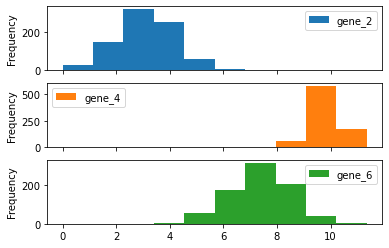

In [28]:
# plotting genes 2, 4, and 6 into a histogram of their gene sequence values for all samples
raw_data.plot(y=['gene_2','gene_4','gene_6'], kind='hist', subplots=True)

This is a great start to get a better picture of the gene data. The pandas plotting function can take more arguments and create cleaner figures if so desired, but for better and more complex figures we will move one to using libraries like [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). 

### 2.2.1 Seaborn & Matplotlib

The basic plotting library in python is **matplotlib** and a lot can be accomplished with its integrated functions, depending on how much you are willing to work to get it exactly how you want. Given that we are interested in statistical visualizations, we are going to work with the **seaborn** library:
> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Alright so let's try to make a better histogram, or distribution plots, than the basic ones we did before.


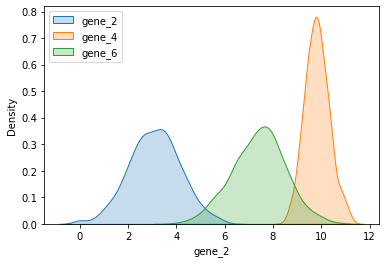

In [29]:
# selecting the same genes (2,4,6) and plotting them in the same figure
cols = ['gene_2', 'gene_4', 'gene_6']

# FIXME: why the for loop? (since you reference this later)
for col in cols:
    sns.kdeplot(raw_data[col], shade=True, legend=True)

plt.legend(cols,loc='upper left')
plt.show()

Personally I think this is already an improvement from the plots we did through pandas and matplotlib earlier. More aesthetic improvements can be accomplished, and we'll leave that for you to explore. For now we will try some more seaborn plots and improving aesthetics in those.

Let's now do a simple visualization to check how the gene sequece shows in the samples. Let's first do a simple plot looking at the first sample, **sample_0** and we'll plot the sample's gene values in a scatter plot.

To do this we first however need the samples to go from being the row values into being the columns, since our plotting libraries need the input to be in vectors/series/arrays. This is accomplished very easily once your data is in a pandas dataframe by simply transposing the dataframe.

In [30]:
# Transposing the dataframe
data_transpose = raw_data.T # the .T when applied to a pandas dataframe will transpose the dataframe
data_transpose.head()

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
Unnamed: 0,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_791,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800
gene_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.436588,0,0,0,0,0
gene_1,2.01721,0.592732,3.51176,3.66362,2.65574,3.46785,1.22497,2.85485,3.99212,3.64249,...,3.08006,4.3374,2.06822,4.28839,4.47218,1.86564,3.94296,3.24958,2.59034,2.32524
gene_2,3.26553,1.58842,4.3272,4.50765,2.82155,3.58192,1.69118,1.75048,2.77273,4.42356,...,2.81574,2.59713,0.857663,3.45249,4.90875,2.7182,4.45381,3.70749,2.78798,3.80593
gene_3,5.47849,7.58616,6.88179,6.65907,6.53945,6.62024,6.57201,7.22672,6.54669,6.84951,...,6.20962,6.07038,6.21874,7.20915,5.93785,7.3501,6.3466,8.1859,7.31862,6.53025


Ok now we see that the *genes* are in the rows, but we see that the *samples* became the first row and we want them to be headers.

In [31]:
data_transpose_new_headers_df = data_transpose.copy()
dt_new_header = data_transpose_new_headers_df.iloc[0] #grab the first row for the header
data_transpose_new_headers_df = data_transpose_new_headers_df[1:] #take the data less the header row
data_transpose_new_headers_df.columns = dt_new_header #set the header row as the df header

In [32]:
# Checking how our dataframe looks now
data_transpose_new_headers_df.head()

Unnamed: 0,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_791,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800
gene_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.436588,0,0,0,0,0
gene_1,2.01721,0.592732,3.51176,3.66362,2.65574,3.46785,1.22497,2.85485,3.99212,3.64249,...,3.08006,4.3374,2.06822,4.28839,4.47218,1.86564,3.94296,3.24958,2.59034,2.32524
gene_2,3.26553,1.58842,4.3272,4.50765,2.82155,3.58192,1.69118,1.75048,2.77273,4.42356,...,2.81574,2.59713,0.857663,3.45249,4.90875,2.7182,4.45381,3.70749,2.78798,3.80593
gene_3,5.47849,7.58616,6.88179,6.65907,6.53945,6.62024,6.57201,7.22672,6.54669,6.84951,...,6.20962,6.07038,6.21874,7.20915,5.93785,7.3501,6.3466,8.1859,7.31862,6.53025
gene_4,10.432,9.62301,9.87073,10.1962,9.73826,9.70683,9.64051,9.75869,10.4883,9.46447,...,9.64447,9.86399,10.6231,9.87562,9.3309,10.006,10.0569,9.50408,9.98714,9.56037


Now to make a simpler handling when plotting the data in **seaborn**, we'll take the index of the dataframe (*Unnamed: 0*) and reset it to get a number for each gene. This will be the fastest way to go through the 20K genes.

In [33]:
# getting the index number which in this case also coinsides with gene number
data_transpose_new_headers_df.reset_index(inplace=True)
data_transpose_new_headers_df['gene'] = data_transpose_new_headers_df.index # adds new column gene at the end of the dataframe

data_transpose_new_headers_df.head()

Unnamed: 0,index,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,...,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800,gene
0,gene_0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.436588,0,0,0,0,0,0
1,gene_1,2.01721,0.592732,3.51176,3.66362,2.65574,3.46785,1.22497,2.85485,3.99212,...,4.3374,2.06822,4.28839,4.47218,1.86564,3.94296,3.24958,2.59034,2.32524,1
2,gene_2,3.26553,1.58842,4.3272,4.50765,2.82155,3.58192,1.69118,1.75048,2.77273,...,2.59713,0.857663,3.45249,4.90875,2.7182,4.45381,3.70749,2.78798,3.80593,2
3,gene_3,5.47849,7.58616,6.88179,6.65907,6.53945,6.62024,6.57201,7.22672,6.54669,...,6.07038,6.21874,7.20915,5.93785,7.3501,6.3466,8.1859,7.31862,6.53025,3
4,gene_4,10.432,9.62301,9.87073,10.1962,9.73826,9.70683,9.64051,9.75869,10.4883,...,9.86399,10.6231,9.87562,9.3309,10.006,10.0569,9.50408,9.98714,9.56037,4


Great!!! Now we can choose the individual sample we are interested in and plot it in our scatterplot.

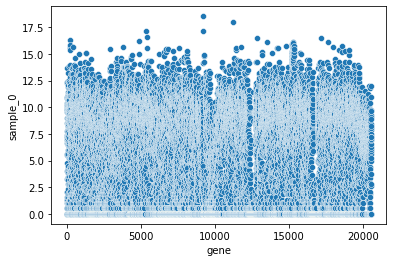

In [34]:
# first basic scatterplot visualization 
sns.scatterplot(y="sample_0", x='gene', data=data_transpose_new_headers_df)
plt.show()

Ok great, we've created the scatterplot visual, it is rough and small, so here is where we will start to make adjustments to get a better understanding of our gene data.

We'll adjust the size of the figure, the axis, and the level of transparancy of the points (here known as alpha). We can also take a moment to address the **"Plot Style"**, the preset look of that would come out from your figure. You can look at the various styles matplotlib has available [here](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html). For now we will use the "ggplot" style.

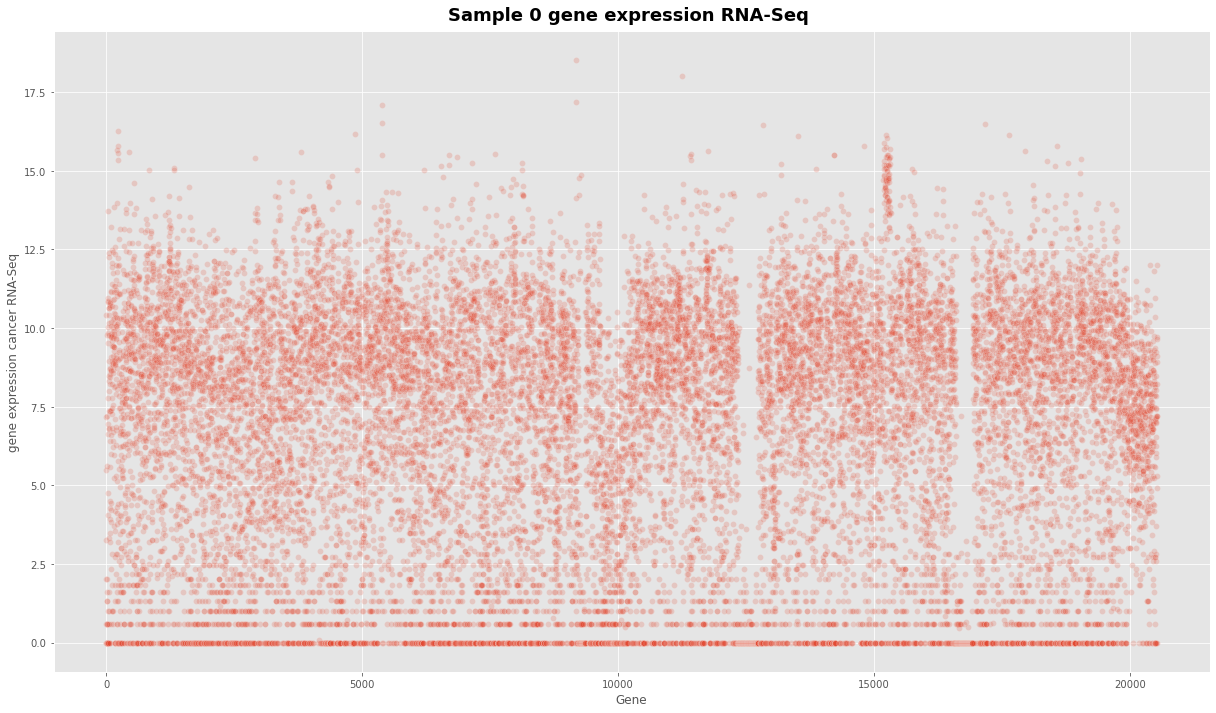

In [35]:
# setting up the plot style
plt.style.use('ggplot')

fig_dims = (17, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax, y="sample_0", x='gene', data=data_transpose_new_headers_df,
               alpha=.2)

# make adjustments
ax.set_ylabel('gene expression cancer RNA-Seq')
ax.set_xlabel('Gene')

ax.text(x=0.5, y=1.01, s='Sample 0 gene expression RNA-Seq ', fontsize=18, 
        weight='bold', ha='center', va='bottom', transform=ax.transAxes)

fig.tight_layout()
plt.show()

Ok so now that we've plotted the gene sequence for one sample, lets see if we can get a better view as to how the different samples compare for each sample cancer type. There is however a few extra data wrangling and transforming that need to be done which will make working with the libraries and making more aesthetically pleasing visuals process easier.

### 2.2.2 Dataframe Format for Seaborn

One of the great functionalities of plotting libraries like seaborn, is the fact that we can provide specific argument like labels, and the functions will set individual colors and labeling options for these. In order to accomplish this, the labels must be provided as part of a column, so for our current genes dataframe we would need to do some reformatting.

Our genes dataframe is in what is known as **wide format**, more columns than rows. Given we are interested in doing some EDA and visualizations, it is more conveninent to have a dataframe in **long format**, more rows than columns, which can be accomplish by a variety of techniques, in this example we will use the **melt** function.

We first want to add a the cancer type labels for the samples, which can be done for by assigning the *Class* column values from the data labels dataframe to a column in our genes dataframe. 

In [36]:
data_wide = raw_data.copy() # creating a copy of the dataframe to no mess with original dataframe
data_wide['Class'] = data_labels.Class.values # assigning cancer type values from labels 
data_wide.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


Ok now just going to make a few extra naming conventions for the columns by getting the samples as a single number from their index location.

In [37]:
# data_wide_noindex = data_wide.reset_index()
data_wide['Unnamed: 0'] = data_wide.index
data_wide.rename(columns={'Unnamed: 0':'Sample'}, inplace=True)
data_wide.head()

,Sample,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


Now we will implement the *melt()* function on our dataset. "Melting" the dataframe pivots the data on user specified columns as a new index, which can be multi-level, and converts the column headers into row values of a new **variable** columns and all the values from those columns get placed into respective row values of a **value** column.

In [38]:
# data_wide_melt = data_wide.drop(columns=['Unnamed: 0']).melt(id_vars=['Class'])
data_wide_melt = data_wide.melt(id_vars=['Class','Sample'])
data_wide_melt.head()

,Class,Sample,variable,value
0,PRAD,0,gene_0,0.0
1,LUAD,1,gene_0,0.0
2,PRAD,2,gene_0,0.0
3,PRAD,3,gene_0,0.0
4,BRCA,4,gene_0,0.0


Now we'll just do some renaming of columns and get rid of the "gene_" character string from the values in the variable column, as we only need the number of the gene.

In [39]:
data_melt = data_wide_melt.copy()
data_melt['variable'] = data_melt['variable'].map(lambda x: x.lstrip('gene_'))
data_melt.rename(columns={"variable": "Gene"}, inplace=True)
data_melt.head()

,Class,Sample,Gene,value
0,PRAD,0,0,0.0
1,LUAD,1,0,0.0
2,PRAD,2,0,0.0
3,PRAD,3,0,0.0
4,BRCA,4,0,0.0


Now that our dataframe is ready, we can plot in all the gene expressions and seaborn will automatically assign a color, without the need for use to use a for loop like we did before. 
FIXME: what does color mean? (it would be useful to say since you assign a different color earlier)

*Beware*, due to the size of this dataframe, this chart will take a very long time to render.

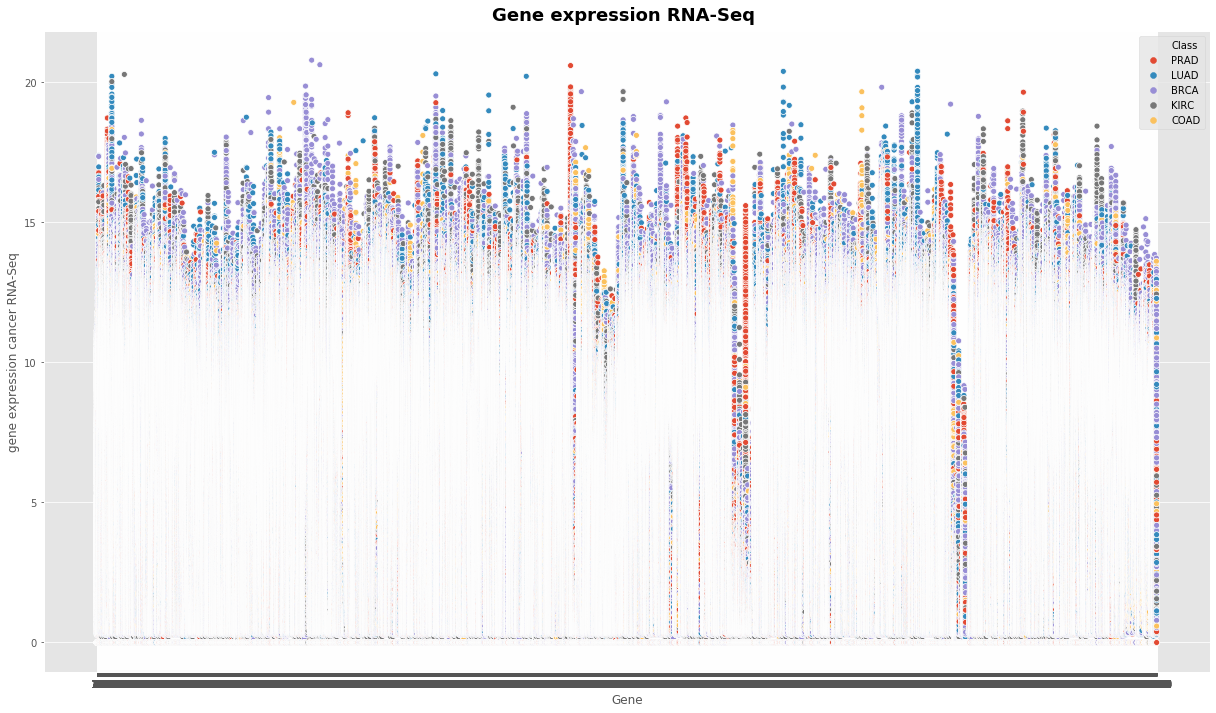

In [44]:
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data_melt, x="Gene", y="value", hue="Class")

# make adjustments
ax.set_ylabel('gene expression cancer RNA-Seq')
ax.set_xlabel('Gene')

ax.text(x=0.5, y=1.01, s='Gene expression RNA-Seq ', fontsize=18, 
        weight='bold', ha='center', va='bottom', transform=ax.transAxes)

fig.tight_layout()
plt.show()

## 3. TCGA Data, Specific Group Statistics, and Altair

Ok we have some experience dealing with data cleaning and wrangling, as well as with some visualization techniques. The data we have used so far from the PANCAN research was fairly clean and easy to handle from the start. 

As a final example for this Notebook let's give a try to a different set of data, one which we'll be using for the remainder of the tutorials. We have compile a dataset inspired by the PANCAN dataset using five TCGA projects available from the [National Cancer Institute's Genomic Data Commons](https://gdc.cancer.gov/):
* BRCA (Breast cancer)
* KIRC (Kidney renal clear cell carcinoma)
* COAD (Colon adenocarcinoma)
* LUAD (Lung adenocarcinoma)
* PRAD (Prostate adenocarcinoma)

same as those found in the PANCAN dataset, but with the added convenience of metadata being available for this dataset.

You can find the information to access the data in the [Data](https://github.com/fredhutchio/ml-pancancer-example/tree/main/data) path in this git directory.


### 3.1 Loading and Cleaning TCGA Data

Something to have in mind before loading the TCGA data is the size of this file. This new data is quite large, it's actually twice the size of the original PANCAN dataset, so we could encounter the issue of running into enough memory in our notebook. We have a very large dataset and could possibly lead to large memory usage. We will use our *metadata.csv* file, which contains information about the cancer type as well as other clinical information about the sample, to create a smaller subset that we hope will contain a representation of the larger dataset.

We could go ahead and subset the genes dataset the same way we did earlier in this Novice Notebook, however we have the possibility of not obtaining a sample representative of the dataset, say we could end with different proportions for the number of LUAD or PRAD than the ones we originally had in our larger genes file. So we will work first with our metadata dataset and learn a little from it. 

In [25]:
# loading the metadata
metadata = pd.read_csv('../metadata.csv')

metadata.head(3)

,barcode,shortLetterCode,tumor_stage,age_at_diagnosis,year_of_diagnosis,alcohol_history,race,ethnicity,gender,vital_status,year_of_birth,year_of_death,days_to_death,cancer_type
0,TCGA-A2-A1FW-01A-11R-A13Q-07,TP,stage iiia,22779.0,2010.0,Not Reported,white,not hispanic or latino,female,Alive,1948.0,NaN,NaN,BRCA
1,TCGA-AO-A0J4-01A-11R-A034-07,TP,stage ia,15052.0,2009.0,Not Reported,black or african american,not hispanic or latino,female,Alive,1968.0,NaN,NaN,BRCA
2,TCGA-AN-A04C-01A-21R-A034-07,TP,stage iib,18851.0,2008.0,Not Reported,white,not hispanic or latino,female,Alive,1957.0,NaN,NaN,BRCA


We can now see the different demographics available in the dataset for each of the individual samples. Let's check both the shape of the dataframe as well as look at the proportions of the entire dataframe for the cancer types.

In [26]:
# checking the shape
print('Number of rows : {0:5d} \nNumber of cols : {1:5d}'
      .format(metadata.shape[0],metadata.shape[1]))

pd.DataFrame(metadata.groupby(['cancer_type'])['barcode'].count()/metadata.shape[0]).rename(columns={'barcode':'Proportion'})

Number of rows :  3499 
Number of cols :    14


,Proportion
cancer_type,
BRCA,0.349243
COAD,0.148900
KIRC,0.174621
LUAD,0.169763
PRAD,0.157474


 Our metadata file shows us that we have over 3000 samples of the 5 different cancer types and each with a variety of demographic data attach to it. We want to randomly select from these samples to concerve the information.

In Data Science and specifically Machine Learning, we have a python library designed for machine learning models and techniques, the [scikit-learn](https://scikit-learn.org/stable/index.html) library. We will use this in our **Expert Notebook** but for now I want to use one useful function from scikit-learn for splitting datasets, the [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [27]:
# loading the specific funtion from the scikit-learn (sklearn) library
from sklearn.model_selection import train_test_split

The **train_test_split** function will take in our dataframe and return a split with a larger and smaller, or a train and a test, dataframes according a **test_size** parameter which expecifies the size of the smaller dataframe compared to the original dataframe. We only want a smaller sample than the original, so while the default would be a 25% (.25) test_size, we will keep it to 10%.

In [28]:
# splitting data and getting a .10 test_size or small_split data size
# By convention called Train and Test dataframes, we'll call them big_split and small_split for now
big_split, small_split = train_test_split(metadata, test_size=.1, random_state=4)

In [29]:
# checking the shape and proportions of the small split
print('Number of rows : {0:5d} \nNumber of cols : {1:5d}'
      .format(small_split.shape[0],small_split.shape[1]))

pd.DataFrame(small_split.groupby(['cancer_type'])['barcode'].count()/small_split.shape[0]).rename(
    columns={'barcode':'Proportion'})

Number of rows :   350 
Number of cols :    14


,Proportion
cancer_type,
BRCA,0.320000
COAD,0.168571
KIRC,0.188571
LUAD,0.137143
PRAD,0.185714


Checking the proportions we can see that we end up with a very similar distribution for the cancer types as from the original metadata dataframe, which is what we were hoping for. 

Ok so why did we go through all that? Why not just load the entire genes.csv file right away?
Well, we could have, but again we could have definitely run into low or insufficient memory problems. The functions to load data from the pandas library, in this case *read_csv*, allow for us to load specific rows and columns from the file in question by using the arguments *skiprows* and *usecols*. We will keep all our columns for now, but go ahead and only use the rows from the index in the **small_split** dataframe.

In [30]:
# getting the index in order from the big_split, since we want to skip those 
# need to add 1 so that we dont have problems with the headers from the csv file
skiplines = np.sort(big_split.index) + 1 

genes_small = pd.read_csv('../genes.csv', skiprows=skiplines) # assigning rows to skip

genes_small.shape #checking the shape

(350, 56449)

Good we seem to have accomplished what we wanted. Now let's just go along with the usual steps of checking the data and cleaning it that we already did earlier in the tutorial.

In [31]:
# quick look at the data
genes_small.head(3)

,barcode,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,TCGA-BH-A18I-01A-11R-A12D-07,68649.025091,4575.767077,521514.449025,96843.776876,37541.631314,70686.864260,231379.239015,379041.542660,70606.680649,...,0.0,456.782304,0.0,69912.075855,2026.680878,0.0,0.0,0.000000,19785.708017,1466.942452
1,TCGA-BH-A0C1-01B-11R-A12D-07,696814.135821,1726.076978,556314.824401,200106.626803,115325.271771,40396.859144,221005.137293,500600.176081,94118.665967,...,0.0,387.693071,0.0,76644.574692,8791.833629,0.0,0.0,2554.213175,7719.399817,933.798365
2,TCGA-A8-A07G-01A-11R-A034-07,236498.144205,2370.679437,691662.733062,127339.048434,44194.027131,31961.428948,162563.597256,577929.407637,206925.964129,...,0.0,387.255874,0.0,69149.290849,1240.923362,0.0,0.0,0.000000,7710.694734,1399.117996


In [32]:
# Check that the values are the same for the samples barcodes
# we can do this by doing a 'mean' of setting the columns equal to eachother and checking this
# of the mean is not '1', then at least one of these values is not the same
np.mean(small_split['barcode'].sort_index().values == genes_small['barcode'])

1.0

In [33]:
# there are no NA values, but let's check how many all 0s do we have
print('Number of rows with all Zero values : {0:5d} \nNumber of cols with all Zero values : {1:5d}'
      .format(genes_small.loc[genes_small.isin([0]).all(axis=1),:].shape[0], 
              genes_small.loc[:,genes_small.isin([0]).all(axis=0)].shape[1]))

Number of rows with all Zero values :     0 
Number of cols with all Zero values :  1832


We have seen that we did in fact load to right rows and we also have almost two thousand genes with no expression. Moreover, if we notice the values in this genes dataframe compared to the PANCAN from earlier, they are very large. The PANCAN had been transformed, likely by a **log tranformation**, to make the values smaller. Let's make a log transformation of the dataframe and drop the genes with no expression to finish the "cleaning".

In [34]:
# dropping genes with no expression
genes_nonAllZero = genes_small.loc[:,~genes_small.isin([0]).all(axis=0)]

# transforming the dataframe by a log base 2, but other options are available
# need to omit none integer value columns, the 'barcode' in this case for errors
genes_log2_trans = np.log2(genes_nonAllZero.iloc[:,1:] + 1)
genes_log2_trans['barcode'] = genes_small['barcode'] # adding back barcode
genes_log2_trans.head(3)

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920,barcode
0,16.066973,12.160113,18.992350,16.563387,15.196242,16.109175,17.819906,18.532000,16.107538,18.042538,...,8.838518,0.0,16.093275,10.985615,0.0,0.0,0.000000,14.272244,10.519580,TCGA-BH-A18I-01A-11R-A12D-07
1,19.410416,10.754117,19.085545,17.610417,16.815362,15.301991,17.753727,18.933302,16.522209,19.331350,...,8.602488,0.0,16.225915,13.102112,0.0,0.0,11.319228,12.914460,9.868511,TCGA-BH-A0C1-01B-11R-A12D-07
2,17.851475,11.211693,19.399711,16.958327,15.431596,14.964089,17.310654,19.140536,17.658762,17.598664,...,8.600864,0.0,16.077448,10.278360,0.0,0.0,0.000000,12.912832,10.451333,TCGA-A8-A07G-01A-11R-A034-07


We finally reached a similar dataset as the one for the PANCAN.

### 3.2 Creating Specific Group Statistics

Ok the reason we want to use this genes dataset is due to it having more descriptive information as well as demographics data, which can possibly could look up in [COSMIC](https://cancer.sanger.ac.uk/) for information on genes.

Right now we are interested in seeing if we can do some conclusions about gene sequences from each cancer type. Is there some genes that have higher count values than others, possibly showing a genes importance in influencing cancer?

Let's add the cancer type labels and get some statistical summaries for these.

In [35]:
# merging the demographics data from small_split metadata with the genes dataframe
genes_merged = pd.merge(left=small_split, right=genes_log2_trans, how='left', left_on='barcode', right_on='barcode')
genes_merged.head(3)

,barcode,shortLetterCode,tumor_stage,age_at_diagnosis,year_of_diagnosis,alcohol_history,race,ethnicity,gender,vital_status,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,TCGA-YL-A8HJ-01A-11R-A36G-07,TP,not reported,21416.0,2009.0,Not Reported,white,not hispanic or latino,male,Alive,...,0.0,9.514700,0.000000,16.623075,11.229908,0.000000,0.000000,11.648106,14.595309,10.197190
1,TCGA-OL-A66K-01A-11R-A29R-07,TP,stage iia,26299.0,2010.0,Not Reported,white,not hispanic or latino,female,Dead,...,0.0,0.000000,7.541357,15.186443,10.850017,7.744871,10.110324,0.000000,14.185199,11.460256
2,TCGA-D8-A1X7-01A-11R-A14M-07,TP,stage iia,14858.0,2010.0,Not Reported,white,not hispanic or latino,female,Alive,...,0.0,7.371455,0.000000,16.080059,11.664703,0.000000,0.000000,11.083273,12.384756,10.953567


All the demographics and meta data has been merged with their respective gene sequece. We will focus on the cancer types and get some descriptive statistics such as: mean, standard deviation, percentiles, etc. 

Instead of using the *describe()* function from before, we will have to group the samples by the type of label or *group*. We'll use the [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function, which groups a dataframe by a specific label column. We can then perform some aggregate function (sum, mean, etc) by combining the *groupby* with the [agg()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) function. 

In [36]:
# dropping all columns that are not gene expression, barcode, and cancer_type
# columns dropped are index 1 through 12
data_rename = genes_merged.drop(genes_merged.iloc[:, 1:13], axis=1)

# renaming barcode and cancer type columns
data_rename.rename(columns={'barcode':'Sample Number', 'cancer_type':'Class'}, inplace=True)

data_count_byClass = data_rename.groupby(['Class'])[['Sample Number']].agg('count')
data_gene_mean_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).agg('mean')
data_gene_std_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).agg(np.std)
data_gene_min_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).agg('min')
data_gene_max_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).agg('max')
data_gene_q25_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).quantile(0.25)
data_gene_q75_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).quantile(0.75)
data_gene_q90_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).quantile(0.90)

Ok so we created summary arrays for each of the statistics specified for the cancer type groups for each gene expression sequence. Let's just take a quick look at one of them to see the mean and 75th quantile.

In [38]:
# mean for each gene expression by cancer type
data_gene_mean_byClass

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,17.820487,11.380308,19.345532,16.582702,15.506399,15.667694,16.997621,18.855948,16.776556,18.230445,...,0.937077,7.389952,0.895765,15.608890,10.849077,2.411495,3.794070,2.320546,14.143176,9.914829
COAD,19.522268,13.204120,19.918876,15.766276,15.222809,15.176650,15.877086,19.481048,17.095496,17.840849,...,0.894831,8.022896,0.269818,15.658656,9.999835,1.327108,1.315701,1.363564,12.869153,3.623831
KIRC,18.039506,11.524577,18.809128,15.379432,13.754263,16.600690,17.222134,19.361350,16.524883,17.336678,...,0.687748,9.241211,2.184700,15.282897,9.603551,3.225500,2.852978,2.163496,14.144646,8.762569
LUAD,18.139404,4.181485,19.160521,15.911955,14.924139,16.871970,17.643702,19.246957,17.432379,18.037890,...,0.138523,7.664326,0.811108,15.734071,9.540636,2.709817,2.173980,2.715294,13.311457,8.777995
PRAD,18.360742,8.391704,19.028556,16.146609,14.038836,14.879897,15.592449,18.990610,17.006010,17.693361,...,0.380080,6.555696,0.326739,14.737812,10.486466,2.689390,4.593908,1.553468,14.939175,8.491484


In [39]:
# the 75th percentile for each gene expression by cancer type
data_gene_q75_byClass

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,18.676000,14.306681,19.504220,17.032725,16.032372,16.243788,17.601688,19.205294,17.243733,18.596295,...,0.0,10.068334,0.00000,16.859433,11.884926,7.200656,9.232943,0.0,14.739607,11.975932
COAD,20.282844,14.694380,20.432079,15.973490,15.642044,16.004500,16.808022,19.659767,17.455072,18.098355,...,0.0,10.477328,0.00000,16.464876,10.578767,0.000000,0.000000,0.0,13.330105,9.228731
KIRC,18.456131,13.322462,19.010984,15.649808,14.105744,17.270700,18.177314,19.633115,16.928477,17.576228,...,0.0,10.587767,6.95442,16.636211,10.262667,7.538895,8.667059,0.0,14.697132,11.157049
LUAD,18.567290,9.042148,19.409334,16.199223,15.510534,17.611011,18.293108,19.705139,19.070089,18.424070,...,0.0,10.028179,0.00000,16.383301,10.297018,7.366346,0.000000,0.0,13.905141,11.355900
PRAD,18.745068,11.775093,19.180848,16.478537,14.267807,15.254984,16.460105,19.294751,17.363378,17.949465,...,0.0,9.188841,0.00000,15.712016,11.173716,7.587463,9.402272,0.0,15.427435,11.416818


Great, so we created summary statistics for each gene expression, what else can we accomplish or how will these be useful? 
Well, as we know, there are so many genes in our dataset, not to mention there are some with much higher expression values than others. Say if we knew with certainty that having having a high RNA-Sequence count was positively correlated as an indication of that gene to have influence in cancer expression. Then we could look at a statistical summary value, say the mean or one of the quantiles, and make this a cutoff so we can subset our data to just those genes we care about.

So that is how we will go about our analysis here, we'll get the "average" of each of these statistics to then get genes that show highest expression overall. We'll use the *describe* function here for each of the cancer types and then try to choose a "cutoff" that we feel comfortable with deprending on the values we see.

In [41]:
# A dataframe for the overall average of each cancer type
print('Dataframe for Averages of Cancer types')
pd.concat([
    data_gene_mean_byClass.loc['BRCA', ].describe(),
    data_gene_mean_byClass.loc['COAD', ].describe(),
    data_gene_mean_byClass.loc['KIRC', ].describe(),
    data_gene_mean_byClass.loc['LUAD', ].describe(),
    data_gene_mean_byClass.loc['PRAD', ].describe()
    ], axis=1
         )

Dataframe for Averages of Cancer types


,BRCA,COAD,KIRC,LUAD,PRAD
count,54616.000000,54616.000000,54616.000000,54616.000000,54616.000000
mean,8.000623,7.574212,8.121622,8.037325,7.908663
std,6.583406,6.743721,6.518284,6.638478,6.719978
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.313867,0.864209,1.609455,1.268499,1.044736
50%,7.152776,6.009849,7.286367,7.238933,6.942570
75%,14.103475,13.902903,14.163970,14.199120,14.218060
max,25.306375,25.886817,26.174118,26.640649,26.358911


In [42]:
# A dataframe for the overall average of each cancer type
print('Dataframe for the 90th Percentile of Cancer types')
pd.concat([
    data_gene_q90_byClass.loc['BRCA', ].describe(),
    data_gene_q90_byClass.loc['COAD', ].describe(),
    data_gene_q90_byClass.loc['KIRC', ].describe(),
    data_gene_q90_byClass.loc['LUAD', ].describe(),
    data_gene_q90_byClass.loc['PRAD', ].describe()
    ], axis=1
         )

Dataframe for the 90th Percentile of Cancer types


,BRCA,COAD,KIRC,LUAD,PRAD
count,54616.000000,54616.000000,54616.000000,54616.000000,54616.000000
mean,10.705729,10.078162,10.934094,10.691179,10.242269
std,6.562043,6.919571,6.313449,6.652358,6.694978
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.158462,0.000000,8.673109,7.583735,4.519151
50%,11.905772,11.724166,11.952297,12.071246,11.588187
75%,15.729825,15.490600,15.737324,15.824680,15.471523
max,26.427874,26.506320,27.461262,27.867912,27.366773


Looking at both the "Averages" and the "90th Percentiles" descriptive statistics tables, I think if we wanted to get genes where all the samples in the data frame met a cutoff, a good number to go for would be above 20 and under 25. This is due to 25 being the lowest value for the "max" average numbers for any cancer type.

Now we can subset the data by trying a few values in that range and get back a dataframe with the desired number of genes to analyze. You can code this "cutoff" by placing a *condition* on the columns argument of the *loc* function (such as >, <, ==, etc), and coding to return only those columns where ___all___ the values meet this condition

In [54]:
# I tried a few values between 20 and 25 (just under the 'max' of the average values)
# I just want to look at about 'top 10-ish' genes, so I settled for 21.9, giving me 8 genes
data_TopVal_genes = data_rename.drop(columns=['Class','Sample Number']).loc[
    :,(data_rename.drop(columns=['Class','Sample Number']) > 21.9).all(axis=0).values]

# placing the classes levels again in the dataframe
data_TopVal_genes['Class'] = data_rename.Class.values
data_TopVal_genes

,ENSG00000034510,ENSG00000075624,ENSG00000087086,ENSG00000112306,ENSG00000137154,ENSG00000142534,ENSG00000184009,ENSG00000231500,Class
0,23.562897,24.843072,25.287959,24.932986,24.199267,24.613322,24.420913,24.618844,PRAD
1,25.112678,24.957643,24.557304,24.696388,23.761401,23.840224,25.101592,23.928458,BRCA
2,24.403420,24.193188,24.044054,23.170247,22.615956,23.023499,24.251368,23.010011,BRCA
3,24.355954,25.015374,23.689761,25.536140,24.878268,25.064970,25.181418,25.358528,BRCA
4,23.649855,23.918374,23.609765,23.189737,23.213148,23.324551,24.790075,23.607582,BRCA
...,...,...,...,...,...,...,...,...,...
345,25.315232,24.612222,24.893571,22.913072,22.731651,23.312528,24.062865,24.259162,BRCA
346,23.979715,24.695577,24.547197,24.459118,23.814048,24.266304,23.855793,24.163183,PRAD
347,25.452206,25.163272,25.641850,25.037489,24.767391,24.699046,24.741842,25.365395,COAD
348,23.638229,24.213446,27.107794,23.585121,22.969729,23.311846,23.956298,22.869865,KIRC


We now have out "Top Values" for gene RNA-Sequence expression for our data. 

FIXME: if you're going to include a result about a specific gene, it would be useful to include the name of the gene!

Let's just do a quick analysis, looking up one of these genes, for example ___ENSG00000087086___, according to [proteinatlas.org](https://www.proteinatlas.org/ENSG00000087086-FTL/pathology) we know that this gene is actually classified under the "Protein Classes":

>__Cancer-related genes__  
Candidate cardiovascular disease genes  
Disease related genes  
FDA approved drug targets  
Plasma proteins  

Similar conclusions can also be drawn from looking up the other values in the "Top Values" subset, and we would be able to focus our research on these.


### 3.3 Visualizing Statistics with Altair

To finish this Novice tutorial, I want to introduce a very useful and fun (personally I love the interactive features) library for statistical visualizations, [__Altair__](https://altair-viz.github.io/).

>   Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite, and the source is available on GitHub.    
  With Altair, you can spend more time understanding your data and its meaning. Altair’s API is simple, friendly and consistent and built on top of the powerful Vega-Lite visualization grammar. This elegant simplicity produces beautiful and effective visualizations with a minimal amount of code.
  
  
We'll do 3 things to finish the tutorial:
1. Transform and prepare our "Top Values" dataframe by using melt()
2. Do a visual in seaborn to compare to altair
3. Show the capasities altair offers for statistical analysis

In [56]:
# melting the dataframe
data_genes_melt = data_TopVal_genes.melt(id_vars=['Class'])
data_genes_melt.rename(columns={"variable": "Gene"}, inplace=True)
data_genes_melt.head()

,Class,Gene,value
0,PRAD,ENSG00000034510,23.562897
1,BRCA,ENSG00000034510,25.112678
2,BRCA,ENSG00000034510,24.403420
3,BRCA,ENSG00000034510,24.355954
4,BRCA,ENSG00000034510,23.649855


No issues in melting the data and pivoting it on the Class or cancer type, not to mention MUCH faster since we have a smaller dataframe.

We'll just pass on the data to create a scatter plot with Seaborn and color the points by the cancer type.

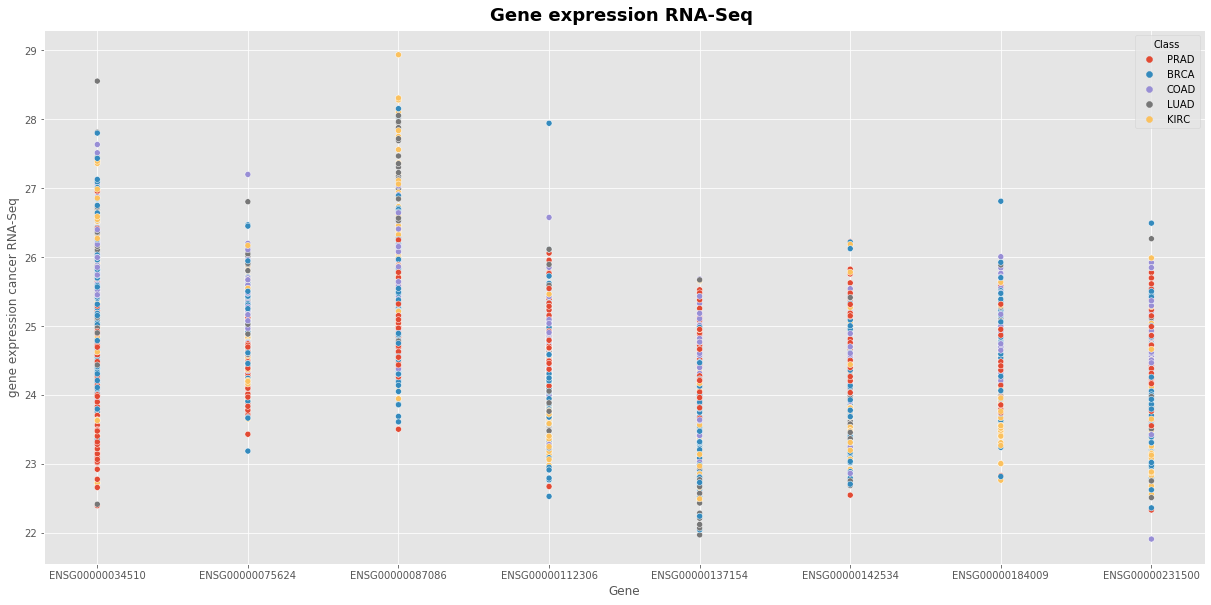

In [65]:
# creating a seaborn scatterplot 
fig_dims = (17, 8.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data_genes_melt, x="Gene", y="value", hue="Class")

# make adjustments
ax.set_ylabel('gene expression cancer RNA-Seq')
ax.set_xlabel('Gene')

ax.text(x=0.5, y=1.01, s='Gene expression RNA-Seq ', fontsize=18, 
        weight='bold', ha='center', va='bottom', transform=ax.transAxes)

fig.tight_layout()
fig.savefig("gene_expression_seaborn.png")
plt.show()

Quick, simple, pretty, and easy to interpret and draw some conclutions from analyzing the individual genes. For instance, if we were to focus again on gene __ENSG00000087086__, we could easily notice that KIRC (Kidney or Renal Cancer), seems to have the highest expression values out of our cancer groups. Once again following the link to __proteinatlas.org__ specific to [__ENSG00000087086__](https://www.proteinatlas.org/ENSG00000034510-TMSB10), we find that the gene is actually classified under:
> Prognostic marker in _renal cancer_ and thyroid cancer.

Great!!! we get to learn something quickly through our static seaborn visual. Now say you start having more question, like what is the distribution of these genes? Is it skewed? What if you want to focus on one of the cancer types? will you have to recode and make some more changes?

Of course I'm asking all these questions to lead us into the features that __Altair__ brings to our analysis. You definitely should look at all the fantastics [__Examples__](https://altair-viz.github.io/gallery/index.html) provided by the altair team, but for this tutorial we'll make a scatter plot with an added interactivity and histogram of the gene expressions.

In [66]:
# Creating Altair visualization
alt.data_transformers.disable_max_rows()

scale = alt.Scale(domain=['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'],
                  range=['#e7ba52', '#a7a7a7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('Class:N', scale=scale)

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])


# Top panel is scatter plot of gene expression for each gene
points = alt.Chart().mark_point().encode(
    alt.X('Gene:N', title='Gene'),
    alt.Y('value:Q',
        title='Gene expression cancer RNA-Seq',
        scale=alt.Scale(domain=[21, 29])
    ),
    color=alt.condition(brush, color, alt.value('lightgray'))
).properties(
    width=550,
    height=300
).add_selection(
    brush, click
).transform_filter(
    click
)

# Bottom panel is a histogram chart of each gene by cancer type
hists = alt.Chart().mark_area( 
    opacity=0.3, 
    interpolate='step'
).encode(
    x=alt.X('value:Q', bin=alt.Bin(maxbins=30)),
    y=alt.Y('count()',
            stack=None),
    color=alt.condition(click, color, alt.value('lightgray'))
).transform_filter(
    brush
).properties(
    width=550,
).add_selection(
    click
)


# vconcat allows for 'vertical' stacking of charts
gene_expression_scatter_hist = alt.vconcat(
    points,
    hists,
    data=data_genes_melt,
    title="Gene Expression"
)

# saving visual as an html file
# you can open on any browser and visual features will remain
gene_expression_scatter_hist.save('gene_expression_scatter_hist.html')

# displaying visual
gene_expression_scatter_hist

alt.VConcatChart(...)


![altair_fig](Gene_expression_altair.gif "altair_fig")

FIXME: ok, this visual is super slick! You should include a note that the image included here is a gif you created. It's not immediately apparent that altair doesn't actually create gifs on its own!

Awesome!!! We were not only able to recreate (not identically) the scatterplot and add a histogram chart, but also join the charts and introduce some interactive features that, besides fun, are super useful in improving our analytics.

You should take time to play and experiment with this visualization, but here is a quick run down of what you can do:
* Click and highlight horizontal section of the top chart, which updates the bottom histogram chart
* Click on individual dots to select a cancer type to focus and "fade out" the others
* Click on an individual histogram distribution to highlight that cancer type